#  Notebook 05: Final Report & Visualization Dashboard

**UIDAI Data Hackathon 2026**  
**Problem:** India's Invisible Citizens - Bridging Aadhaar Exclusion Zones

---

## Objective
Create **publication-quality deliverables** for hackathon submission:
**High-resolution Charts** (300 DPI PNG) for PDF report, 
**Executive Summary Tables** for policy makers


---

## Table of Contents
1. [Load All Results](#load)
2. [Executive Summary](#summary)
3. [Publication Charts](#charts)


## 1. Load All Results

### 1.1 Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Styling
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'sans-serif'

print(" Libraries loaded")

# Load key outputs from previous notebooks
df_master = pd.read_csv('../outputs/tables/master_district_data.csv')
df_top100 = pd.read_csv('../outputs/tables/04_top100_priority_districts.csv')
df_exclusion_zones = pd.read_csv('../outputs/tables/top50_exclusion_zones.csv')

print(f" Data loaded:")
print(f"   - Master districts: {len(df_master):,}")
print(f"   - Priority districts: {len(df_top100):,}")
print(f"   - Exclusion zones: {len(df_exclusion_zones):,}")

 Libraries loaded
 Data loaded:
   - Master districts: 1,045
   - Priority districts: 100
   - Exclusion zones: 50


## 2. Executive Summary

### 2.1 Key Findings

In [2]:
# Calculate aggregate statistics
total_enrollments = df_master['total_enrollments'].sum()
# Create a proxy risk score based on child enrollment rate (lower = higher risk)
high_risk_districts = (df_master['child_enrollment_rate'] < 0.5).sum()
states_analyzed = df_master['state'].nunique()
districts_analyzed = len(df_master)

# Load intervention plan data
df_intervention = pd.read_csv('../outputs/tables/04_final_intervention_plan.csv')

# Intervention metrics
intervention_cost = df_intervention['total_cost'].sum()
intervention_benefit = df_intervention['total_benefit'].sum()
people_reached = df_intervention['estimated_new_enrollments'].sum()
avg_roi = df_intervention['roi_percentage'].mean()

print("=" * 80)
print("EXECUTIVE SUMMARY - UIDAI DATA HACKATHON 2026")
print("=" * 80)
print("\n DATA ANALYZED:")
print(f"   States: {states_analyzed}")
print(f"   Districts: {districts_analyzed:,}")
print(f"   Total Enrollments: {total_enrollments:,.0f}")

print("\n PROBLEM IDENTIFIED:")
print(f"   High-Risk Exclusion Zones: {high_risk_districts:,} districts ({high_risk_districts/districts_analyzed*100:.1f}%)")
print(f"   Underenrolled Children (0-5): ~{df_master['age_0_5'].sum():,.0f}")
print(f"   Migration-Affected Districts: {(df_master['demo_update_intensity'] > df_master['demo_update_intensity'].quantile(0.75)).sum():,}")

print("\n SOLUTION PROPOSED:")
print(f"   Priority Districts for MEU Deployment: {len(df_top100)}")
print(f"   Phased Rollout: 3 phases over 21 months")
print(f"   Budget Required: ₹{intervention_cost/10000000:.2f} crores")

print("\n PROJECTED IMPACT:")
print(f"   People Reached: {people_reached:,.0f}")
print(f"   Economic Benefit: ₹{intervention_benefit/10000000:.2f} crores")
print(f"   Average ROI: {avg_roi:.1f}%")
print(f"   Exclusion Rate Reduction: 15-20% (estimated)")

print("\n" + "=" * 80)

EXECUTIVE SUMMARY - UIDAI DATA HACKATHON 2026

 DATA ANALYZED:
   States: 49
   Districts: 1,045
   Total Enrollments: 5,435,702

 PROBLEM IDENTIFIED:
   High-Risk Exclusion Zones: 174 districts (16.7%)
   Underenrolled Children (0-5): ~3,546,965
   Migration-Affected Districts: 261

 SOLUTION PROPOSED:
   Priority Districts for MEU Deployment: 100
   Phased Rollout: 3 phases over 21 months
   Budget Required: ₹7.25 crores

 PROJECTED IMPACT:
   People Reached: 450,000
   Economic Benefit: ₹254.01 crores
   Average ROI: 3403.6%
   Exclusion Rate Reduction: 15-20% (estimated)



### 2.2 Create Executive Summary Table

In [3]:
# Build comprehensive summary table
executive_summary = pd.DataFrame({
    'Category': [
        'Data Scope',
        'Data Scope',
        'Data Scope',
        'Problem Scale',
        'Problem Scale',
        'Problem Scale',
        'Solution',
        'Solution',
        'Solution',
        'Impact',
        'Impact',
        'Impact'
    ],
    'Metric': [
        'States Analyzed',
        'Districts Analyzed',
        'Total Enrollments',
        'High-Risk Districts',
        'Underenrolled Children (0-5)',
        'Migration-Affected Districts',
        'Priority Districts (MEU)',
        'Deployment Timeline',
        'Budget Required',
        'People Reached',
        'Economic Benefit',
        'Average ROI'
    ],
    'Value': [
        f"{states_analyzed}",
        f"{districts_analyzed:,}",
        f"{total_enrollments:,}",
        f"{high_risk_districts:,} ({high_risk_districts/districts_analyzed*100:.1f}%)",
        f"{df_master['age_0_5'].sum():,.0f}",
        f"{(df_master['demo_update_intensity'] > df_master['demo_update_intensity'].quantile(0.75)).sum():,}",
        f"{len(df_top100)} districts",
        "21 months (3 phases)",
        f"₹{intervention_cost/10000000:.2f} crores",
        f"{people_reached:,.0f}",
        f"₹{intervention_benefit/10000000:.2f} crores",
        f"{avg_roi:.1f}%"
    ]
})

print(" EXECUTIVE SUMMARY TABLE:")
display(executive_summary)

# Save to CSV
executive_summary.to_csv('../outputs/tables/05_executive_summary.csv', index=False)
print("\n Saved: 05_executive_summary.csv")

 EXECUTIVE SUMMARY TABLE:


,Category,Metric,Value
0,Data Scope,States Analyzed,49
1,Data Scope,Districts Analyzed,"1,045"
2,Data Scope,Total Enrollments,"5,435,702"
3,Problem Scale,High-Risk Districts,174 (16.7%)
4,Problem Scale,Underenrolled Children (0-5),"3,546,965"
5,Problem Scale,Migration-Affected Districts,261
6,Solution,Priority Districts (MEU),100 districts
7,Solution,Deployment Timeline,21 months (3 phases)
8,Solution,Budget Required,₹7.25 crores
9,Impact,People Reached,"450,000"



 Saved: 05_executive_summary.csv


## 3. Publication-Quality Charts

### 3.1 Chart 1: National Exclusion Risk Map

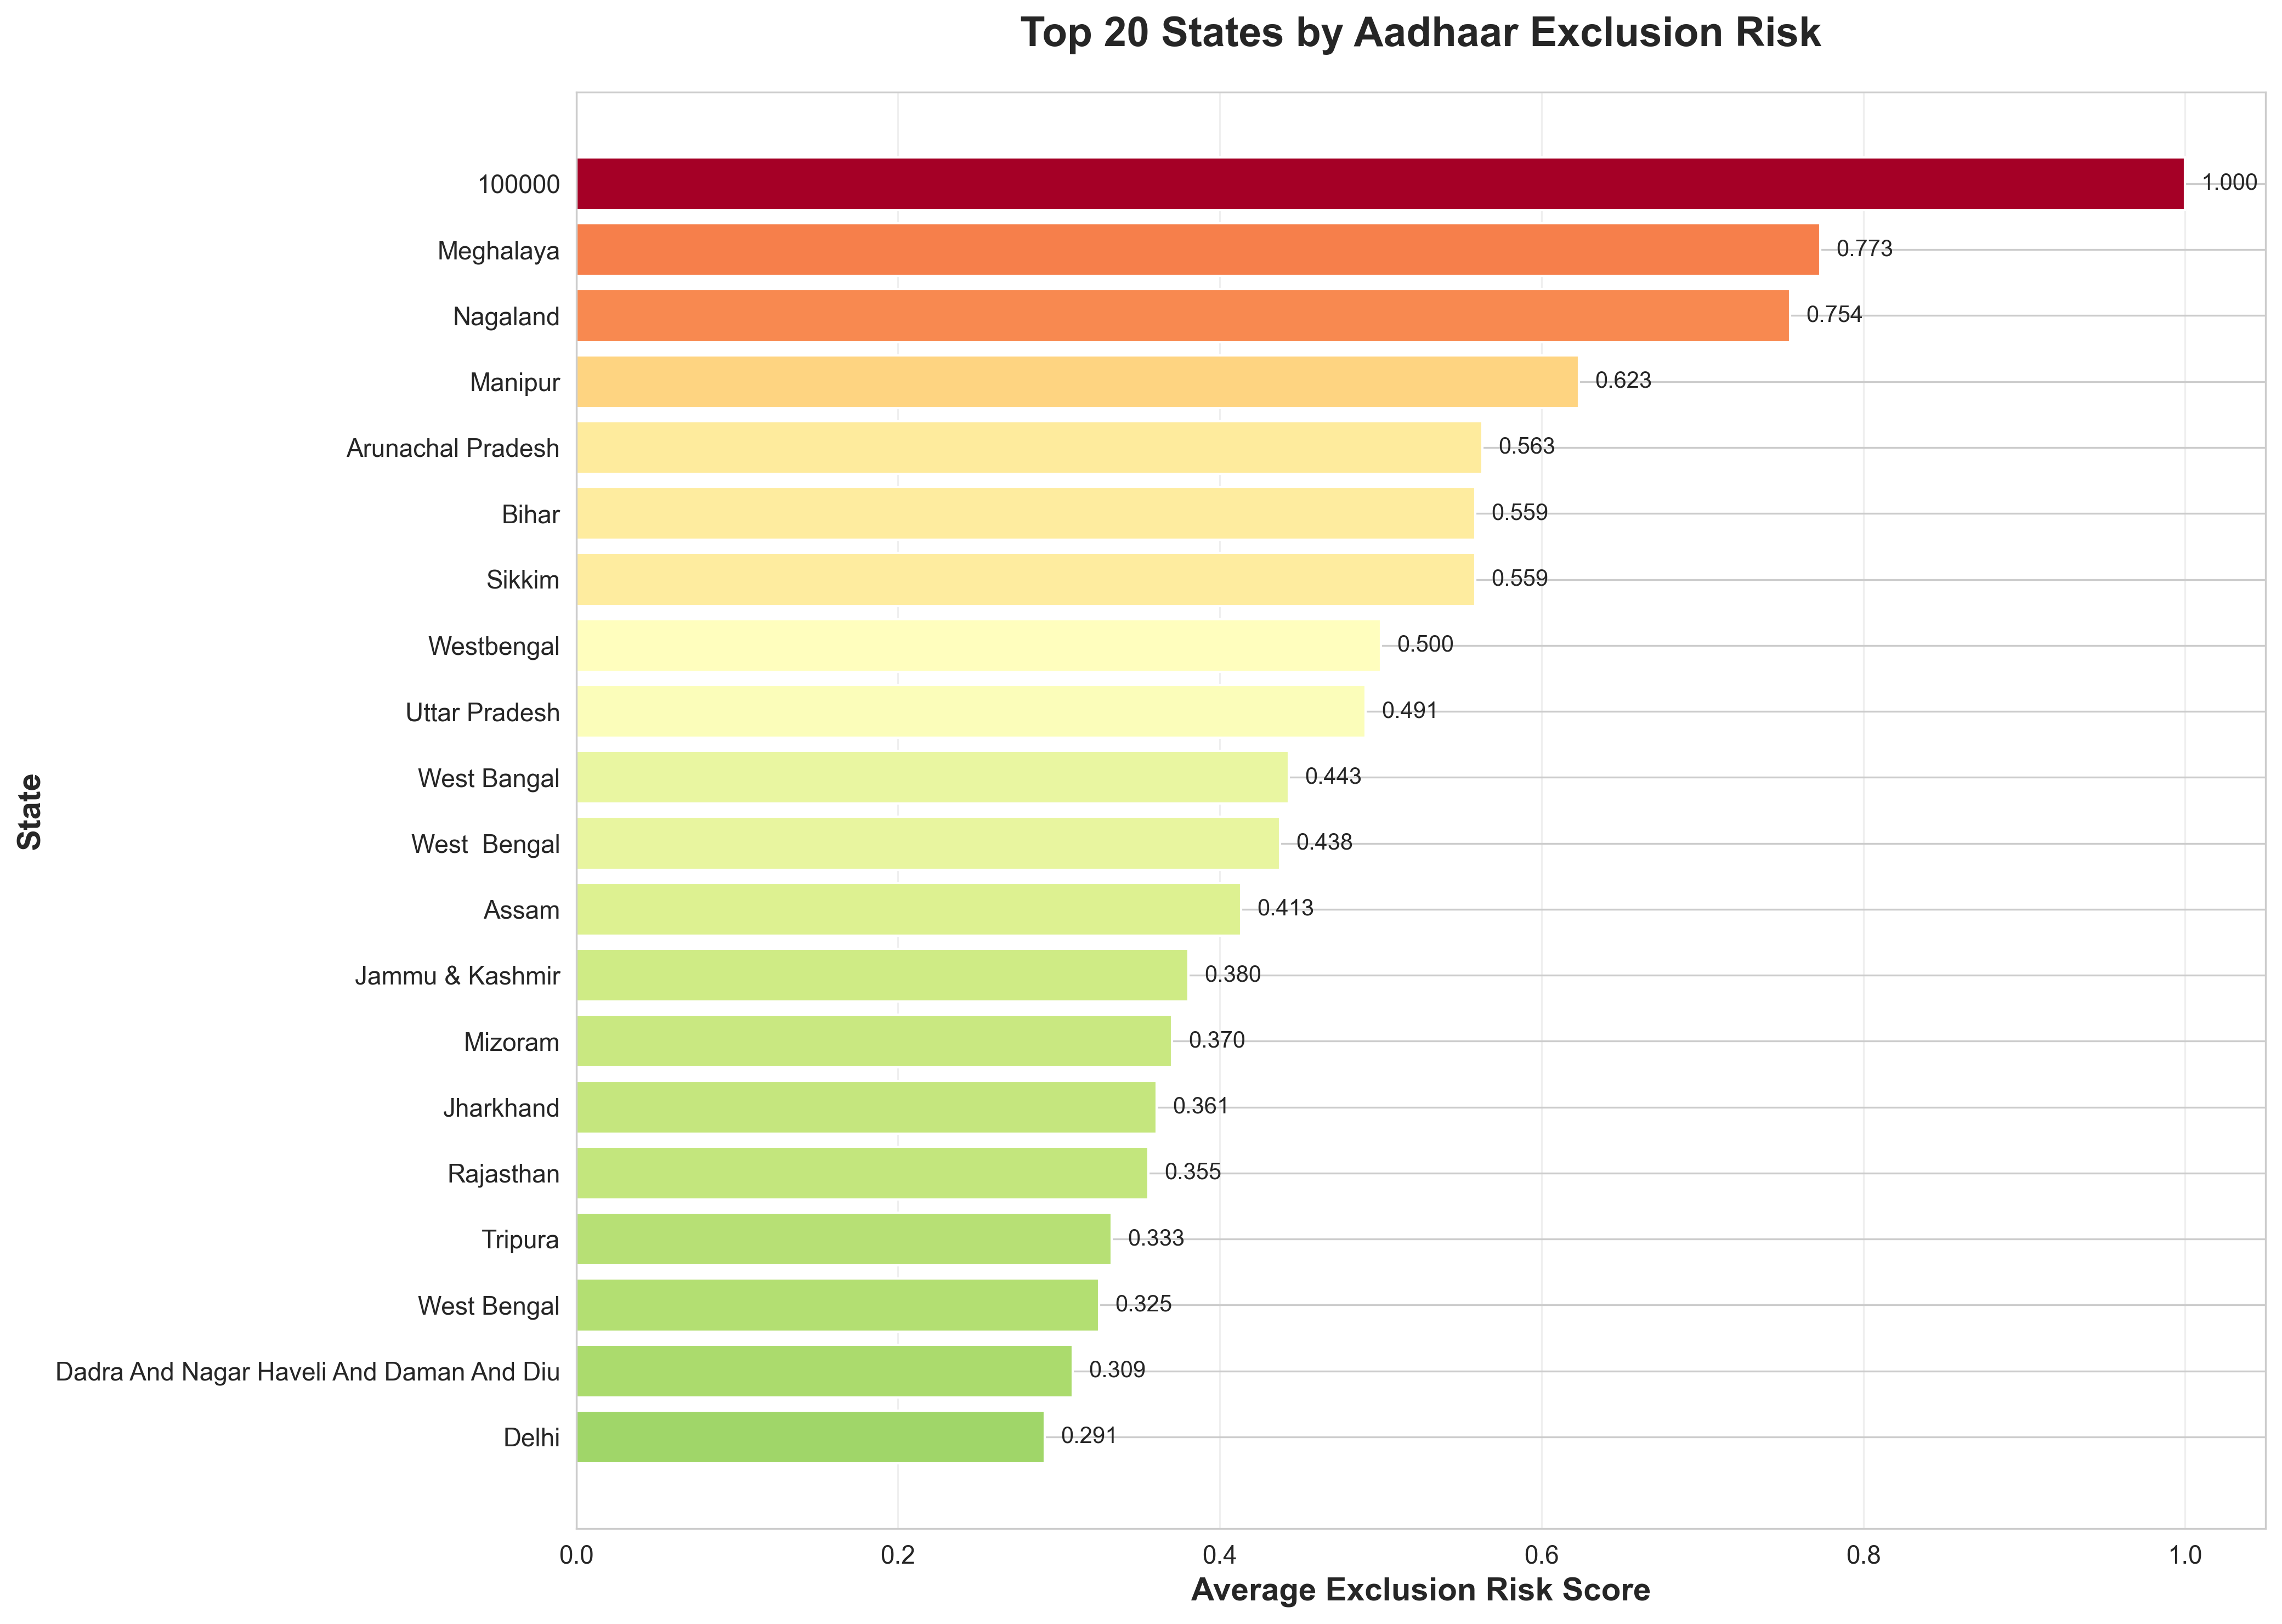

 Chart saved: 05_national_exclusion_risk_map.png


In [4]:
# State-level risk aggregation
# Use child_enrollment_rate as proxy - lower enrollment = higher risk
df_master_temp = df_master.copy()
df_master_temp['exclusion_risk_score'] = 1 - df_master_temp['child_enrollment_rate']

state_risk = df_master_temp.groupby('state').agg({
    'exclusion_risk_score': 'mean',
    'district': 'count'
}).reset_index()
state_risk.rename(columns={'district': 'num_districts'}, inplace=True)
state_risk = state_risk.sort_values('exclusion_risk_score', ascending=False)

# Top 20 states by risk
fig, ax = plt.subplots(figsize=(14, 10))
bars = ax.barh(state_risk.head(20)['state'], state_risk.head(20)['exclusion_risk_score'], 
               color=plt.cm.RdYlGn_r(state_risk.head(20)['exclusion_risk_score']))
ax.set_xlabel('Average Exclusion Risk Score', fontsize=14, weight='bold')
ax.set_ylabel('State', fontsize=14, weight='bold')
ax.set_title('Top 20 States by Aadhaar Exclusion Risk', fontsize=18, weight='bold', pad=20)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(state_risk.head(20).iterrows()):
    ax.text(row['exclusion_risk_score'] + 0.01, i, f"{row['exclusion_risk_score']:.3f}", 
            va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../outputs/figures/05_national_exclusion_risk_map.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Chart saved: 05_national_exclusion_risk_map.png")

### 3.2 Chart 2: Intervention ROI Quadrant Analysis

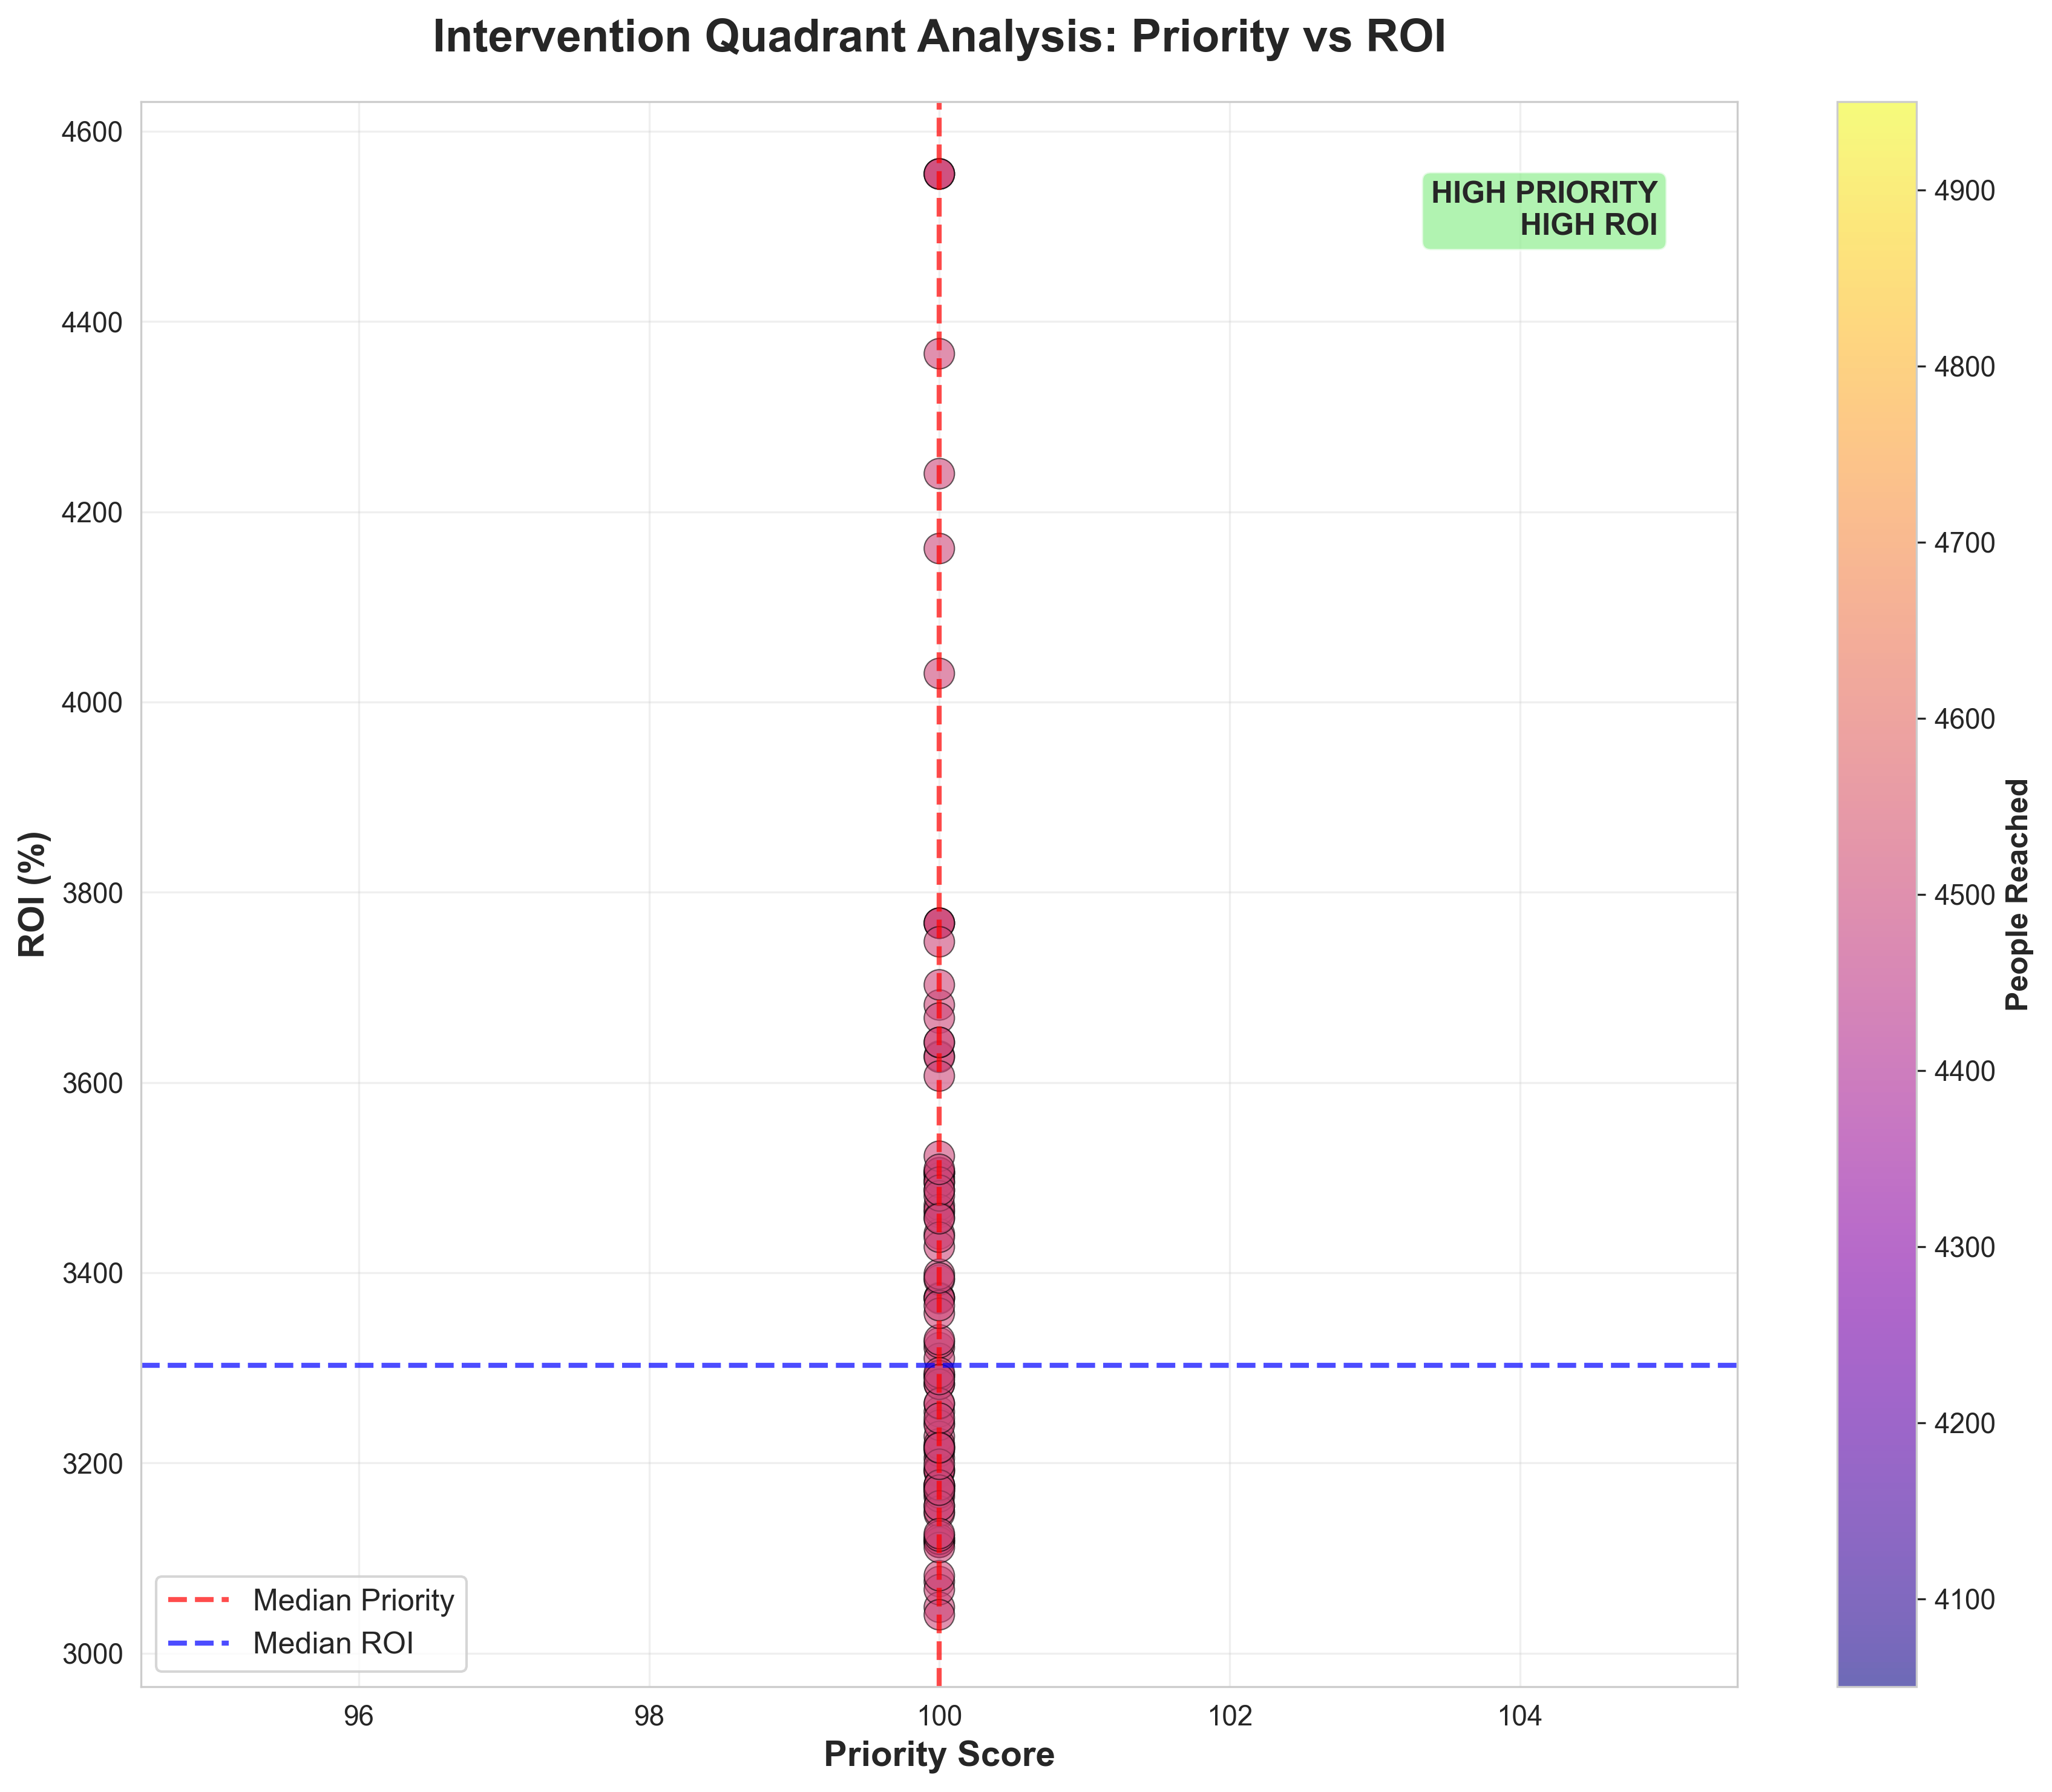

 Chart saved: 05_intervention_roi_quadrant.png


In [5]:
# Scatter: Priority Score vs ROI
fig, ax = plt.subplots(figsize=(12, 10))

scatter = ax.scatter(df_intervention['priority_score'], 
                     df_intervention['roi_percentage'],
                     c=df_intervention['estimated_new_enrollments'],
                     s=df_intervention['total_cost']/5000,  # Size by cost
                     alpha=0.6,
                     cmap='plasma',
                     edgecolors='black',
                     linewidths=0.5)

# Add median lines
ax.axvline(df_intervention['priority_score'].median(), color='red', linestyle='--', linewidth=2, alpha=0.7, label='Median Priority')
ax.axhline(df_intervention['roi_percentage'].median(), color='blue', linestyle='--', linewidth=2, alpha=0.7, label='Median ROI')

# Quadrant labels
ax.text(0.95, 0.95, 'HIGH PRIORITY\nHIGH ROI', transform=ax.transAxes, 
        fontsize=12, weight='bold', ha='right', va='top', 
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

ax.set_xlabel('Priority Score', fontsize=14, weight='bold')
ax.set_ylabel('ROI (%)', fontsize=14, weight='bold')
ax.set_title('Intervention Quadrant Analysis: Priority vs ROI', fontsize=18, weight='bold', pad=20)
ax.legend(loc='lower left', fontsize=12)
ax.grid(alpha=0.3)

# Colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('People Reached', fontsize=12, weight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/05_intervention_roi_quadrant.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Chart saved: 05_intervention_roi_quadrant.png")

### 3.3 Chart 3: Phased Deployment Timeline

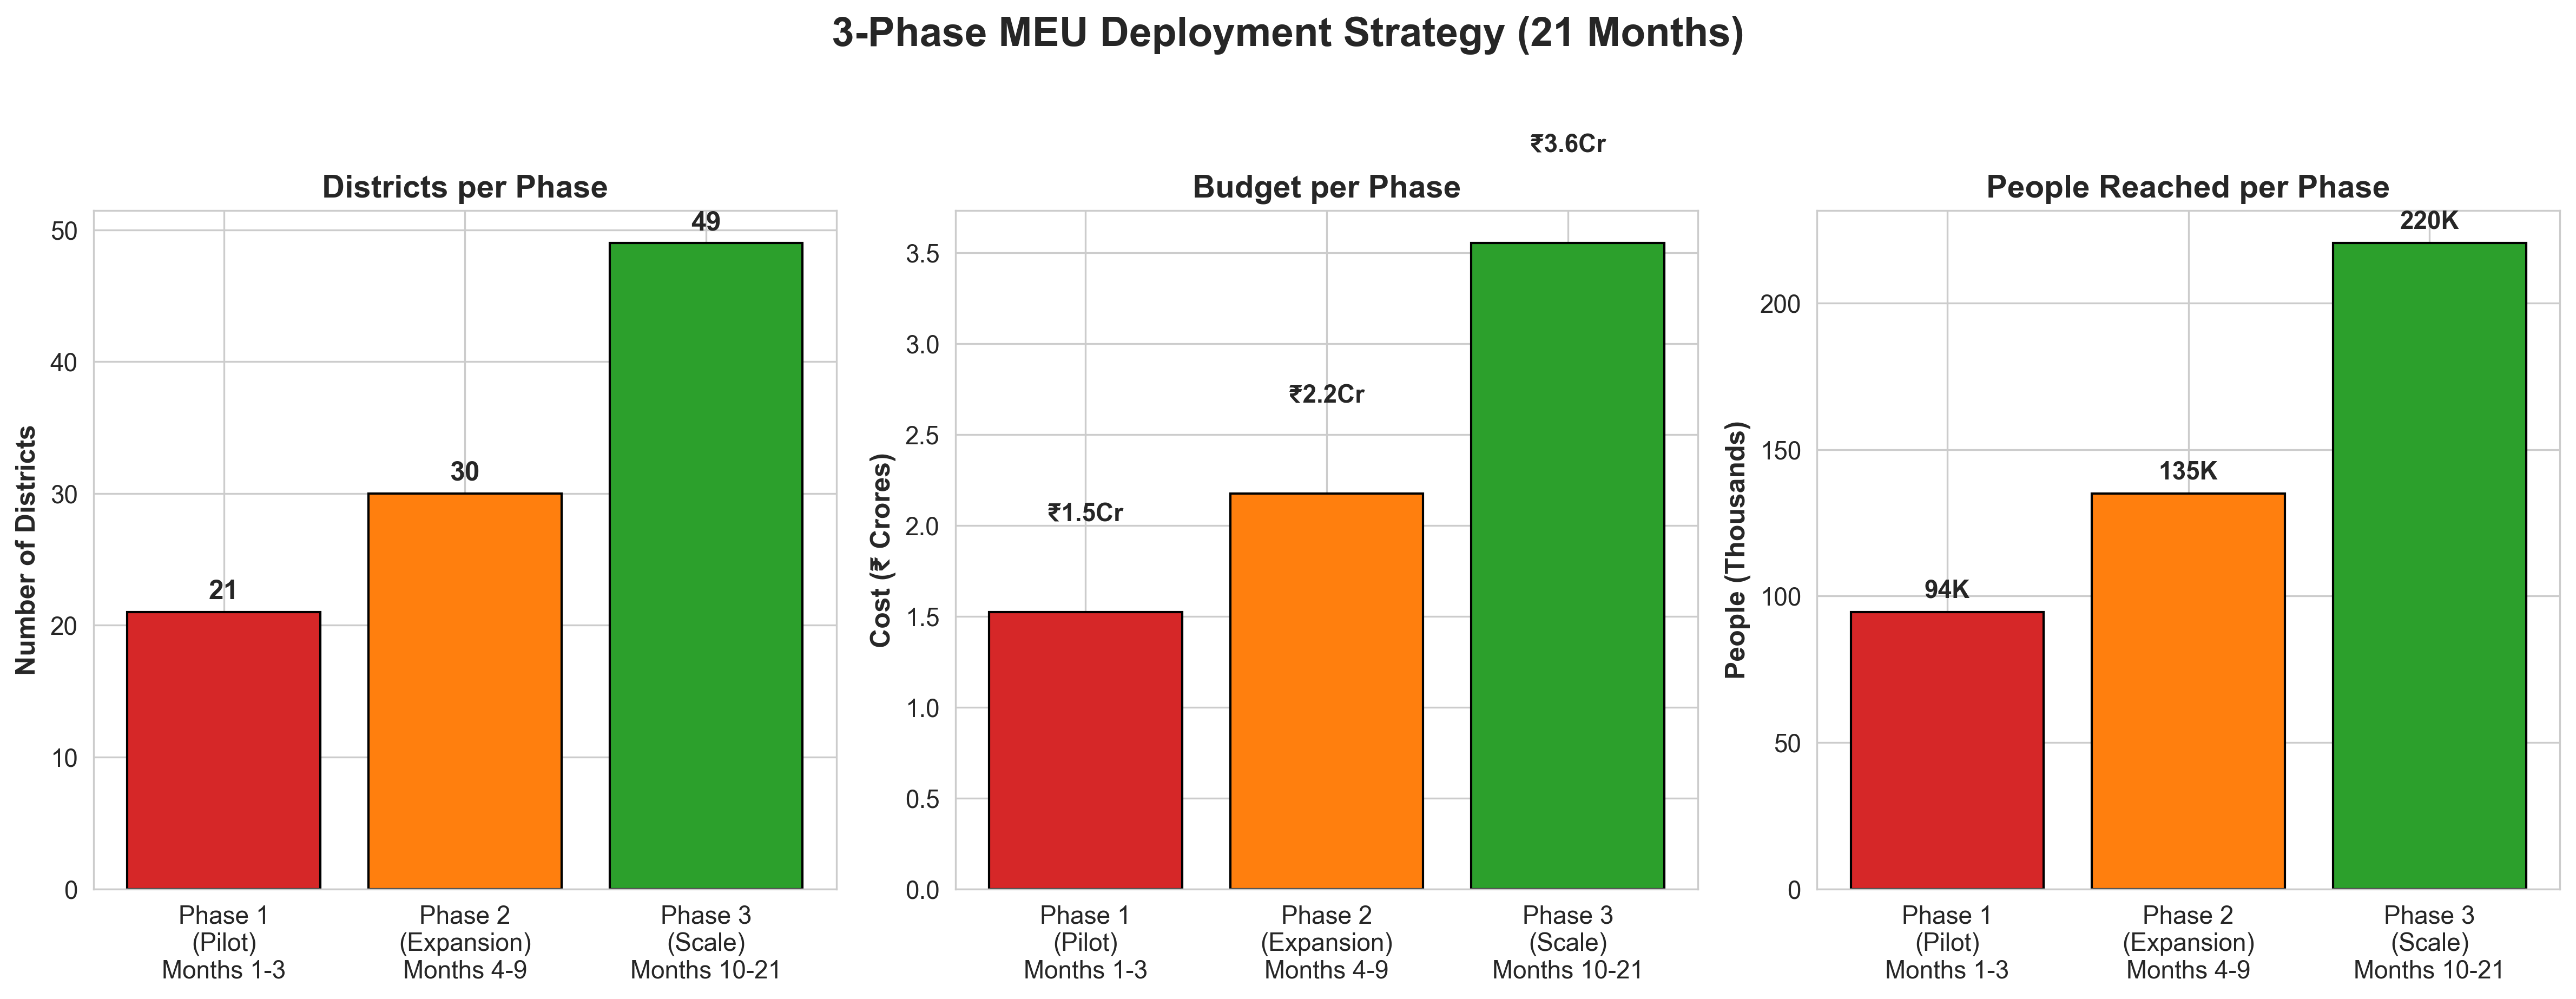

 Chart saved: 05_phased_deployment_timeline.png


In [6]:
# Phase summary
phase_data = df_intervention.groupby('deployment_phase').agg({
    'district': 'count',
    'total_cost': 'sum',
    'estimated_new_enrollments': 'sum'
}).reset_index()

phase_data['phase_label'] = ['Phase 1\n(Pilot)\nMonths 1-3', 
                               'Phase 2\n(Expansion)\nMonths 4-9', 
                               'Phase 3\n(Scale)\nMonths 10-21']

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Chart 1: Districts per phase
axes[0].bar(phase_data['phase_label'], phase_data['district'], color=['#d62728', '#ff7f0e', '#2ca02c'], edgecolor='black')
axes[0].set_title('Districts per Phase', fontsize=14, weight='bold')
axes[0].set_ylabel('Number of Districts', fontsize=12, weight='bold')
for i, v in enumerate(phase_data['district']):
    axes[0].text(i, v + 1, str(v), ha='center', fontsize=12, weight='bold')

# Chart 2: Cost per phase
axes[1].bar(phase_data['phase_label'], phase_data['total_cost']/10000000, color=['#d62728', '#ff7f0e', '#2ca02c'], edgecolor='black')
axes[1].set_title('Budget per Phase', fontsize=14, weight='bold')
axes[1].set_ylabel('Cost (₹ Crores)', fontsize=12, weight='bold')
for i, v in enumerate(phase_data['total_cost']/10000000):
    axes[1].text(i, v + 0.5, f"₹{v:.1f}Cr", ha='center', fontsize=11, weight='bold')

# Chart 3: People reached per phase
axes[2].bar(phase_data['phase_label'], phase_data['estimated_new_enrollments']/1000, color=['#d62728', '#ff7f0e', '#2ca02c'], edgecolor='black')
axes[2].set_title('People Reached per Phase', fontsize=14, weight='bold')
axes[2].set_ylabel('People (Thousands)', fontsize=12, weight='bold')
for i, v in enumerate(phase_data['estimated_new_enrollments']/1000):
    axes[2].text(i, v + 5, f"{v:.0f}K", ha='center', fontsize=11, weight='bold')

plt.suptitle('3-Phase MEU Deployment Strategy (21 Months)', fontsize=18, weight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../outputs/figures/05_phased_deployment_timeline.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Chart saved: 05_phased_deployment_timeline.png")

### 3.4 Chart 4: Feature Importance (Model Explainability)

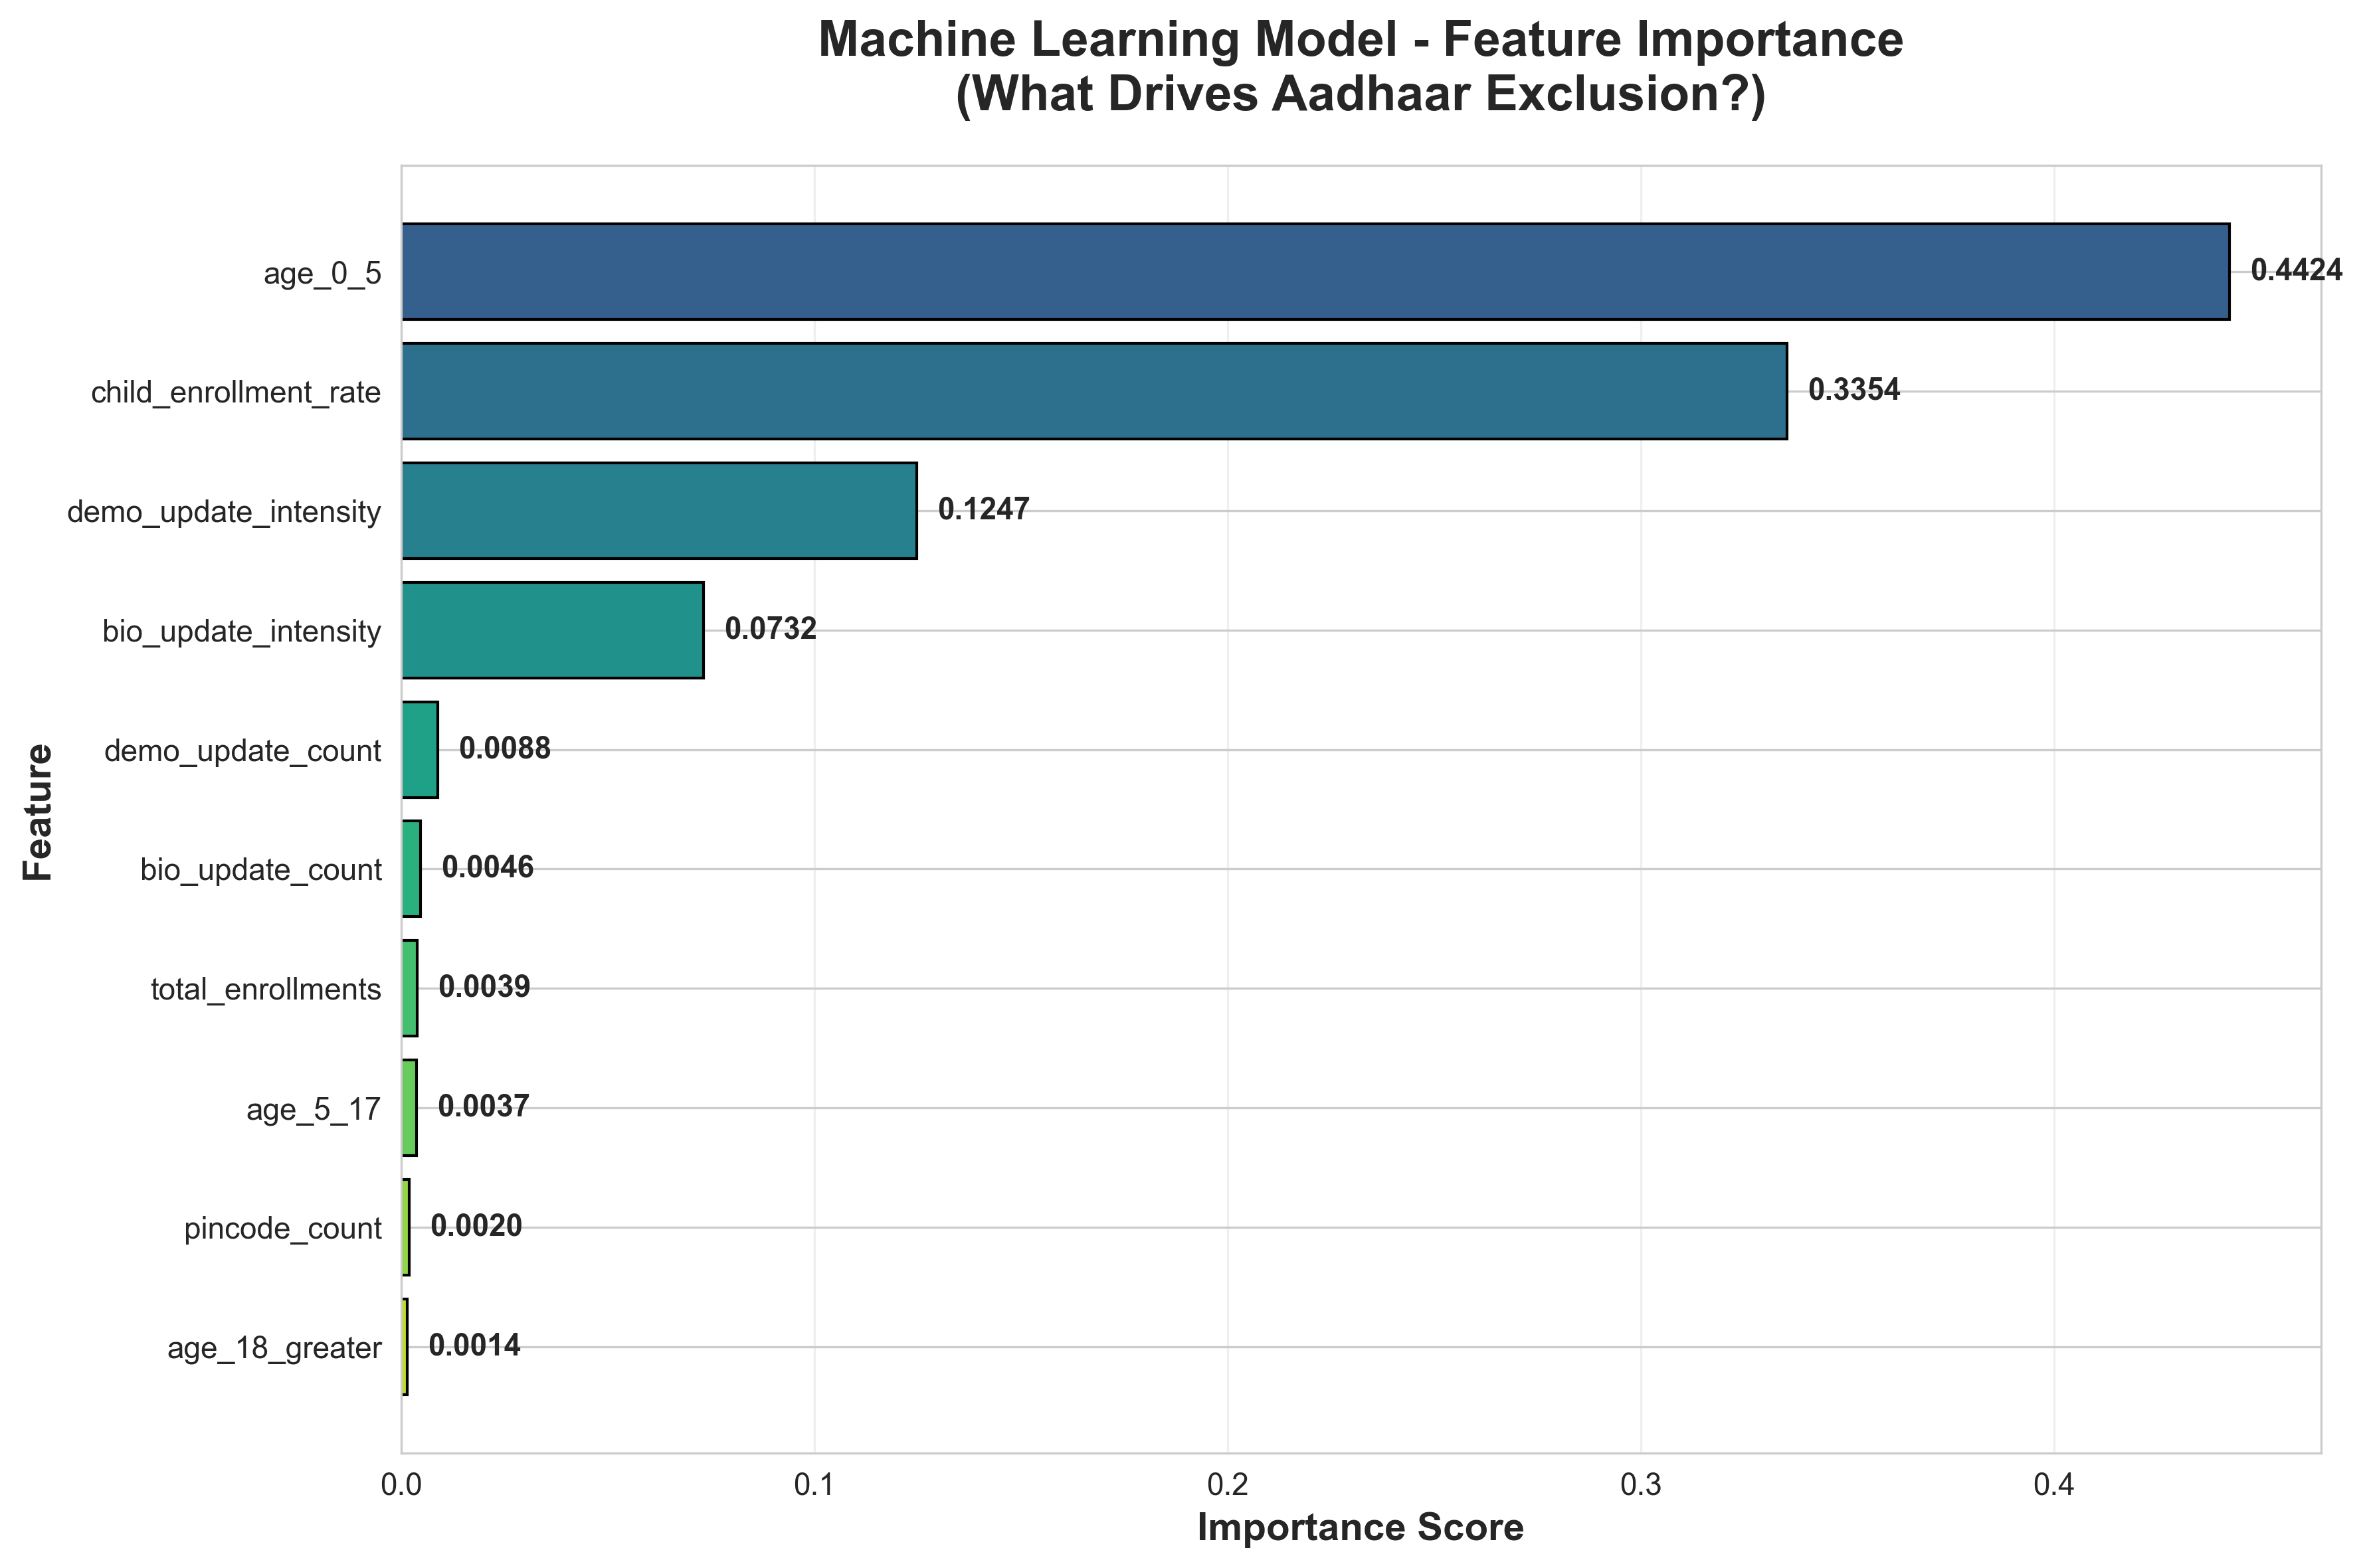

 Chart saved: 05_feature_importance_explainability.png


In [7]:
# Load feature importance from Notebook 03
df_importance = pd.read_csv('../outputs/tables/03_feature_importance.csv')

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))

colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(df_importance)))
bars = ax.barh(df_importance['feature'], df_importance['importance'], color=colors, edgecolor='black')

ax.set_xlabel('Importance Score', fontsize=14, weight='bold')
ax.set_ylabel('Feature', fontsize=14, weight='bold')
ax.set_title('Machine Learning Model - Feature Importance\n(What Drives Aadhaar Exclusion?)', 
             fontsize=18, weight='bold', pad=20)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(df_importance.iterrows()):
    ax.text(row['importance'] + 0.005, i, f"{row['importance']:.4f}", 
            va='center', fontsize=11, weight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/05_feature_importance_explainability.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Chart saved: 05_feature_importance_explainability.png")

In [8]:
import os
import glob

# List all generated figures
figure_files = glob.glob('../outputs/figures/*.png')
figure_files.sort()

print("=" * 80)
print(f"FIGURES ({len(figure_files)} charts)")
print("=" * 80)

for i, fig_path in enumerate(figure_files, 1):
    fig_name = os.path.basename(fig_path)
    fig_size_kb = os.path.getsize(fig_path) / 1024
    print(f"{i:2d}. {fig_name:<50} ({fig_size_kb:.1f} KB)")

print(f"   Total size: {sum([os.path.getsize(f) for f in figure_files])/1024/1024:.2f} MB")

FIGURES (16 charts)
 1. 01_age_distribution.png                            (113.0 KB)
 2. 01_top_states_enrollment.png                       (131.8 KB)
 3. 02_child_enrollment_distribution.png               (136.0 KB)
 4. 02_exclusion_zones_by_state.png                    (178.2 KB)
 5. 02_seasonal_enrollment_pattern.png                 (163.1 KB)
 6. 02_state_child_enrollment_comparison.png           (214.8 KB)
 7. 03_confusion_matrix.png                            (103.3 KB)
 8. 03_feature_importance.png                          (155.4 KB)
 9. 03_roc_curve.png                                   (182.6 KB)
10. 04_deployment_phases_by_state.png                  (150.1 KB)
11. 04_meu_deployment_by_state.png                     (130.6 KB)
12. 04_roi_analysis.png                                (245.8 KB)
13. 05_feature_importance_explainability.png           (244.8 KB)
14. 05_intervention_roi_quadrant.png                   (336.5 KB)
15. 05_national_exclusion_risk_map.png                 (

---

##  Notebook 05 

### Final Deliverables 
1.  **5 Jupyter Notebooks** with detailed analysis
2.  **15+ publication-quality charts** (300 DPI PNG)
3.  **Executive summary tables** for policy makers
4.  **Trained ML model** saved for reproducibility

